# Interaction and Polynomial Terms

In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
url = "/Users/luisinfanten/Desktop/IE/Classes/First-Year/Second-Semester/Simulating and Modelling/Models/Notebooks/Interaction/marketing.csv"
data = pd.read_csv(url, index_col=0)
data.head()

,youtube,facebook,newspaper,sales
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48


In [17]:
model_formula = 'sales ~ youtube + facebook + newspaper'
model = smf.ols(formula=model_formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.58e-96
Time:                        14:56:21   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5267      0.374      9.422      0.0

In [18]:
model_formula = 'sales ~ youtube + facebook'
model = smf.ols(formula=model_formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           4.83e-98
Time:                        14:56:21   Log-Likelihood:                -422.66
No. Observations:                 200   AIC:                             851.3
Df Residuals:                     197   BIC:                             861.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5053      0.353      9.919      0.0

In [19]:
model_formula = 'sales ~ youtube*facebook'
model = smf.ols(formula=model_formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):          6.68e-146
Time:                        14:56:21   Log-Likelihood:                -306.60
No. Observations:                 200   AIC:                             621.2
Df Residuals:                     196   BIC:                             634.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.1003      0.297  

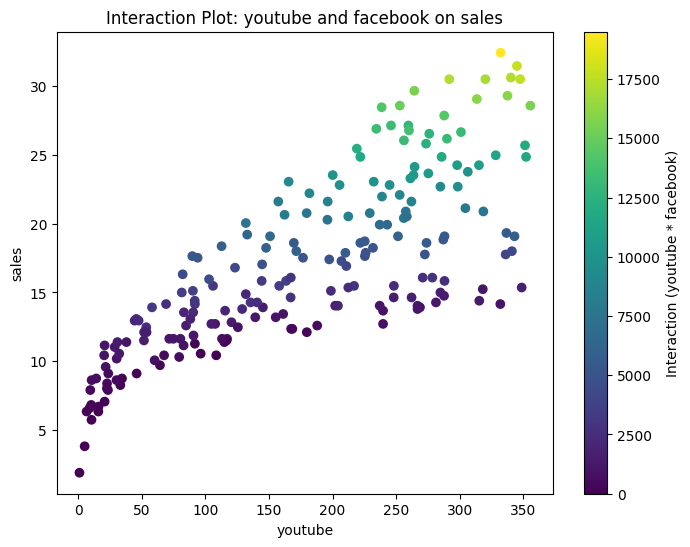

In [20]:
import matplotlib.pyplot as plt

# Compute the interaction term between X1 and X2
data['Interaction'] = data['youtube'] * data['facebook']

# Create a scatter plot with color-coding for the interaction effect
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(data['youtube'], data['sales'], c=data['Interaction'], cmap='viridis')
ax.set_xlabel('youtube')
ax.set_ylabel('sales')
ax.set_title('Interaction Plot: youtube and facebook on sales')

# Add a colorbar to show the interaction effect
cbar = plt.colorbar(scatter)
cbar.set_label('Interaction (youtube * facebook)')

# Show the plot
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


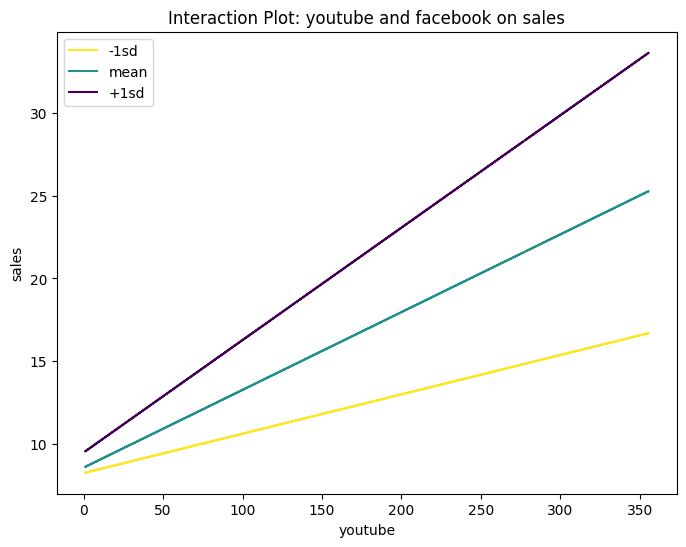

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.api import interaction_plot
from sklearn.linear_model import LinearRegression

# Compute the mean and standard deviation of facebook
mean_facebook = np.mean(data['facebook'])
std_facebook = np.std(data['facebook'])

# Create a categorical variable based on the mean and standard deviation of facebook
data['facebook_cat'] = pd.cut(data['facebook'],
                              bins=[-np.inf, mean_facebook - std_facebook, mean_facebook + std_facebook, np.inf],
                              labels=["-1sd", "mean", "+1sd"])

# Prepare colors for each category
colors = ["#fde725", "#21918c", "#440154"]

# Prepare the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Fit a linear model and plot for each category
for i, category in enumerate(data['facebook_cat'].cat.categories):
    # Subset the data by category
    subset = data[data['facebook_cat'] == category]

    # Fit the linear model
    model = LinearRegression().fit(subset[['youtube']], subset['sales'])

    # Predict over the observed range of youtube
    x_vals = np.array(data['youtube']).reshape(-1, 1)
    y_vals = model.predict(x_vals)

    # Plot the line
    ax.plot(data['youtube'], y_vals, color=colors[i], label=category)

# Set labels and title
ax.set_xlabel('youtube')
ax.set_ylabel('sales')
ax.set_title('Interaction Plot: youtube and facebook on sales')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [22]:
#@title OLS residuals plots function { display-mode: "form" }
def ols_resid_plots(model):

  import numpy as np
  import statsmodels.api as sm
  import matplotlib.pyplot as plt
  from statsmodels.stats.outliers_influence import OLSInfluence
  from statsmodels.nonparametric.smoothers_lowess import lowess

  # Generate the residual values
  residuals = model.resid
  standarized_residuals = OLSInfluence(model).resid_studentized_internal
  fitted_values = model.fittedvalues
  leverage = OLSInfluence(model).hat_matrix_diag
  influence = OLSInfluence(model)
  cooks_d = influence.cooks_distance[0]

  # Set up the figure and the subplots
  fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

  axs[0, 0].scatter(fitted_values, residuals, alpha=0.5)
  axs[0, 0].axhline(y=0, color='gray', linestyle='--')
  axs[0, 0].set_xlabel('Fitted values')
  axs[0, 0].set_ylabel('Residuals')

  # Add a regression line to the scatterplot
  smooth_data = lowess(residuals, fitted_values)
  axs[0, 0].plot(smooth_data[:, 0], smooth_data[:, 1], color='red', alpha=0.5, lw=2)

  # Top-right: QQ plot for standarized residuals
  sm.graphics.qqplot(standarized_residuals, ax=axs[0, 1], line='45')

  # Bottom-left: fitted values vs squared root of standarized residuals
  axs[1, 0].scatter(fitted_values, np.sqrt(np.abs(standarized_residuals)), alpha=0.5)
  axs[1, 0].set_xlabel('Fitted values')
  axs[1, 0].set_ylabel('sqrt(|Standarized residuals|)')

  # Add a Lowess smoother line that fits the best with the data
  smooth_data = lowess(np.sqrt(np.abs(standarized_residuals)), fitted_values)
  axs[1, 0].plot(smooth_data[:, 0], smooth_data[:, 1], color='red', alpha=0.5)

  # Cook's distance plot replacing the previous Leverage vs Standardized Residuals plot
  axs[1, 1].stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)
  axs[1, 1].set_xlabel('Observation index')
  axs[1, 1].set_ylabel("Cook's distance")
  cook_threshold = 4 / (len(residuals) - model.df_model)
  axs[1, 1].axhline(y=cook_threshold, linestyle="--", color="red", label=f'Cook\'s Distance Threshold: {cook_threshold:.3f}')
  axs[1, 1].legend()

  # Annotate observations with high Cook's distance
  for i in np.where(cooks_d > cook_threshold)[0]:
      axs[1, 1].annotate(i, xy=(i, cooks_d[i]), color='red')


  plt.tight_layout()
  plt.show()


In [23]:
np.random.seed(2023)
X = np.random.uniform(0, 1, 100)
a0, a1, a2, a3, a4 = 2, 3, -5, 7, 10
noise = np.random.normal(0, 2, 100)
Y = a0 + a1 * X + a2 * X**2 + a3 * X**3 + a4 * X**4 + noise
data = pd.DataFrame({'X': X, 'Y': Y})
print(data.head())

          X          Y
0  0.321988   2.895032
1  0.890422  14.042572
2  0.588052   3.337375
3  0.126596   6.005324
4  0.141341   2.196864


In [24]:
linear_model = smf.ols(formula = 'Y ~ X', data = data).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     167.7
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           5.95e-23
Time:                        14:56:21   Log-Likelihood:                -235.28
No. Observations:                 100   AIC:                             474.6
Df Residuals:                      98   BIC:                             479.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7846      0.525     -1.494      0.1

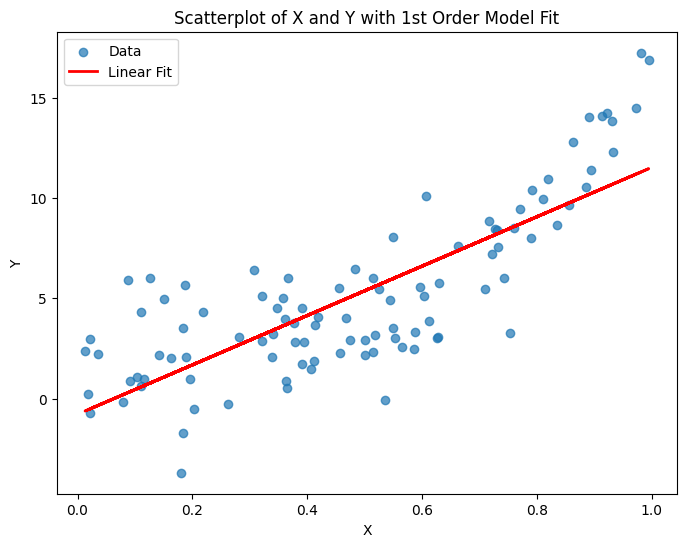

In [25]:
data['Y_pred'] = linear_model.predict(data['X'])
plt.figure(figsize=(8, 6))
plt.scatter(data['X'], data['Y'], label='Data', alpha=0.7)
plt.plot(data['X'], data['Y_pred'], color='red', label='Linear Fit', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of X and Y with 1st Order Model Fit')
plt.legend()
plt.show()

TypeError: Axes.stem() got an unexpected keyword argument 'use_line_collection'

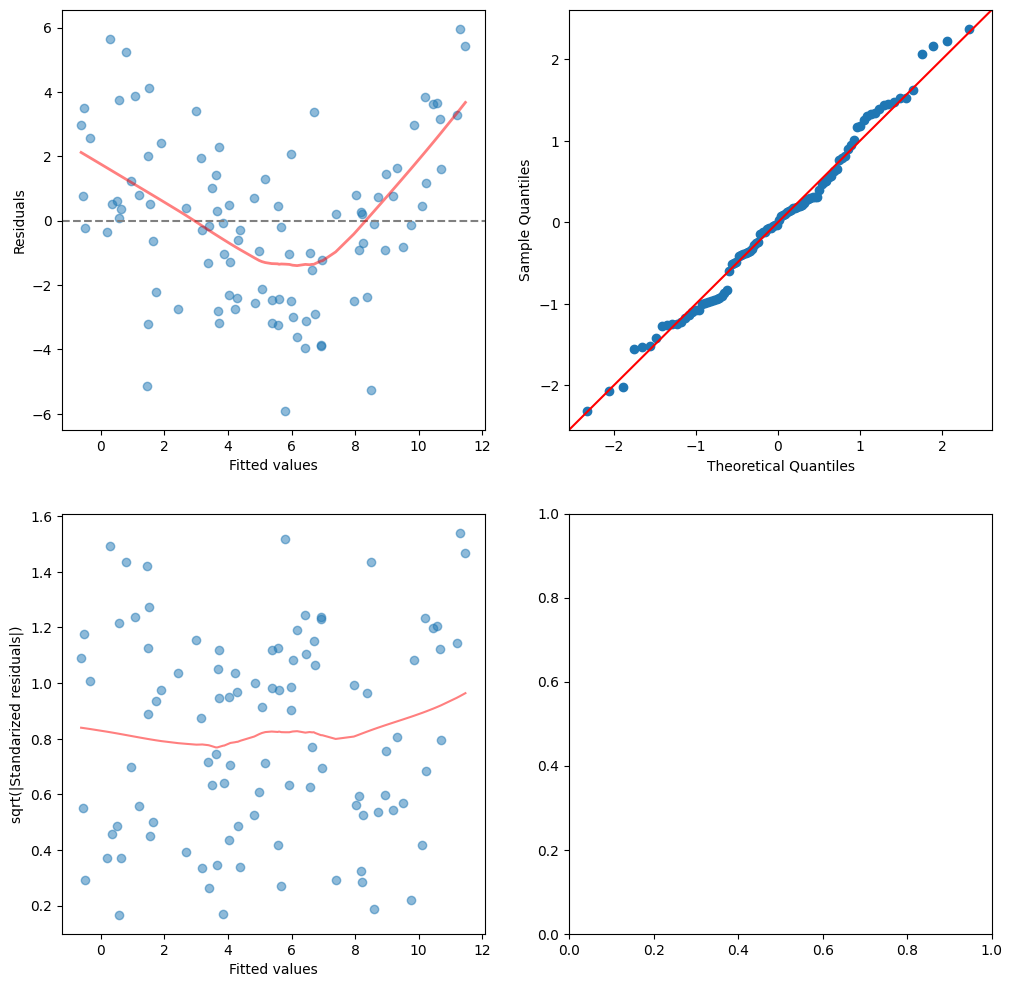

In [26]:
ols_resid_plots(linear_model)

In [ ]:
quadratic_model = smf.ols(formula = 'Y ~ X + I(X**2)', data = data).fit()
print(quadratic_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     158.4
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           2.76e-31
Time:                        09:10:32   Log-Likelihood:                -212.62
No. Observations:                 100   AIC:                             431.2
Df Residuals:                      97   BIC:                             439.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7612      0.635      4.349      0.0

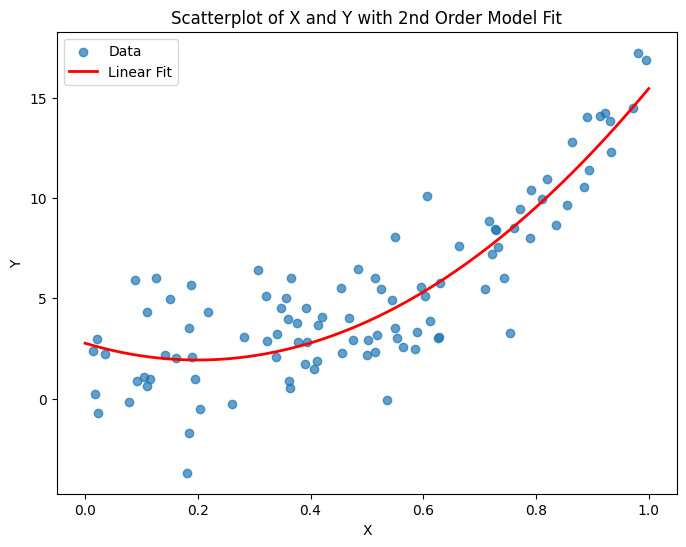

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['X'], data['Y'], label='Data', alpha=0.7)
b0, b1, b2 = quadratic_model.params[0],quadratic_model.params[1],quadratic_model.params[2]
x = np.linspace(0, 1, 1000)
plt.plot(x, b0+b1*x+b2*x**2, color='red', label='Linear Fit', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of X and Y with 2nd Order Model Fit')
plt.legend()
plt.show()

<ipython-input-18-39383d77ab8e>:43: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axs[1, 1].stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)


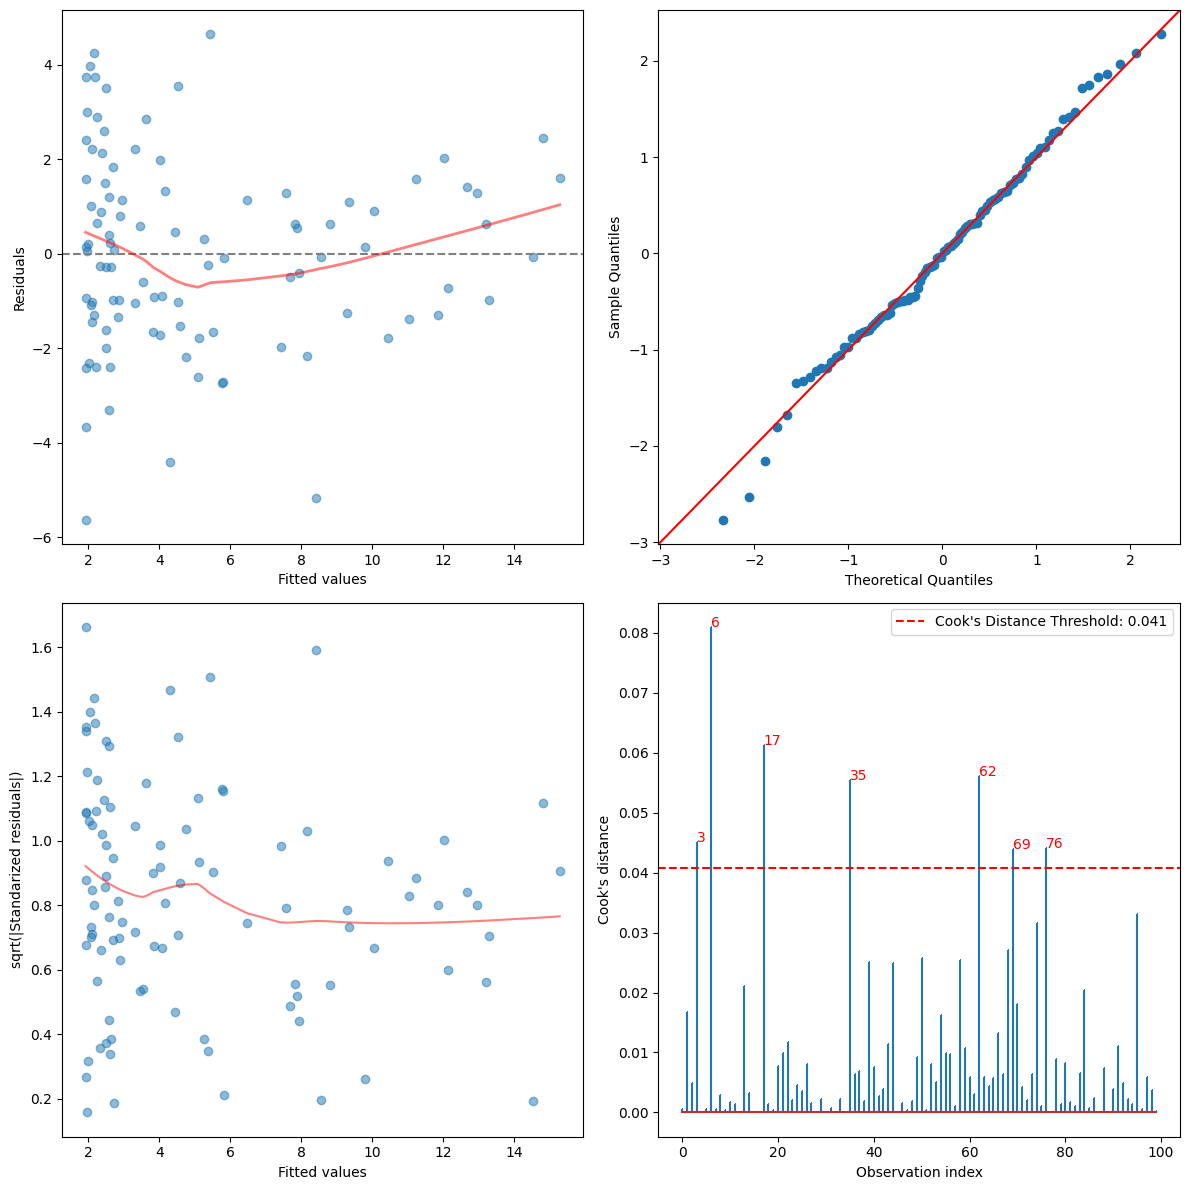

In [ ]:
ols_resid_plots(quadratic_model)

In [ ]:
cubic_model = smf.ols(formula = 'Y ~ X + I(X**2) + I(X**3)', data = data).fit()
print(cubic_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     115.7
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           9.16e-32
Time:                        09:10:46   Log-Likelihood:                -208.68
No. Observations:                 100   AIC:                             425.4
Df Residuals:                      96   BIC:                             435.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2218      0.824      1.484      0.1

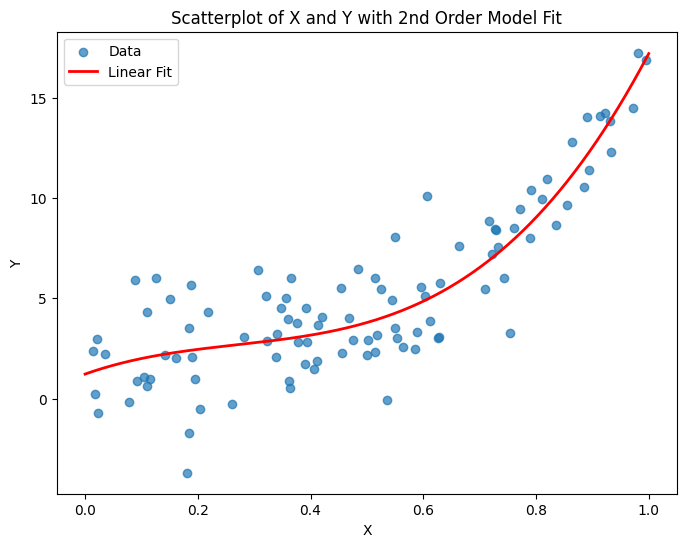

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['X'], data['Y'], label='Data', alpha=0.7)
b0, b1, b2, b3 = cubic_model.params[0],cubic_model.params[1],cubic_model.params[2],cubic_model.params[3]
x = np.linspace(0, 1, 1000)
plt.plot(x, b0+b1*x+b2*x**2+b3*x**3, color='red', label='Linear Fit', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of X and Y with 2nd Order Model Fit')
plt.legend()
plt.show()

<ipython-input-18-39383d77ab8e>:43: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axs[1, 1].stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)


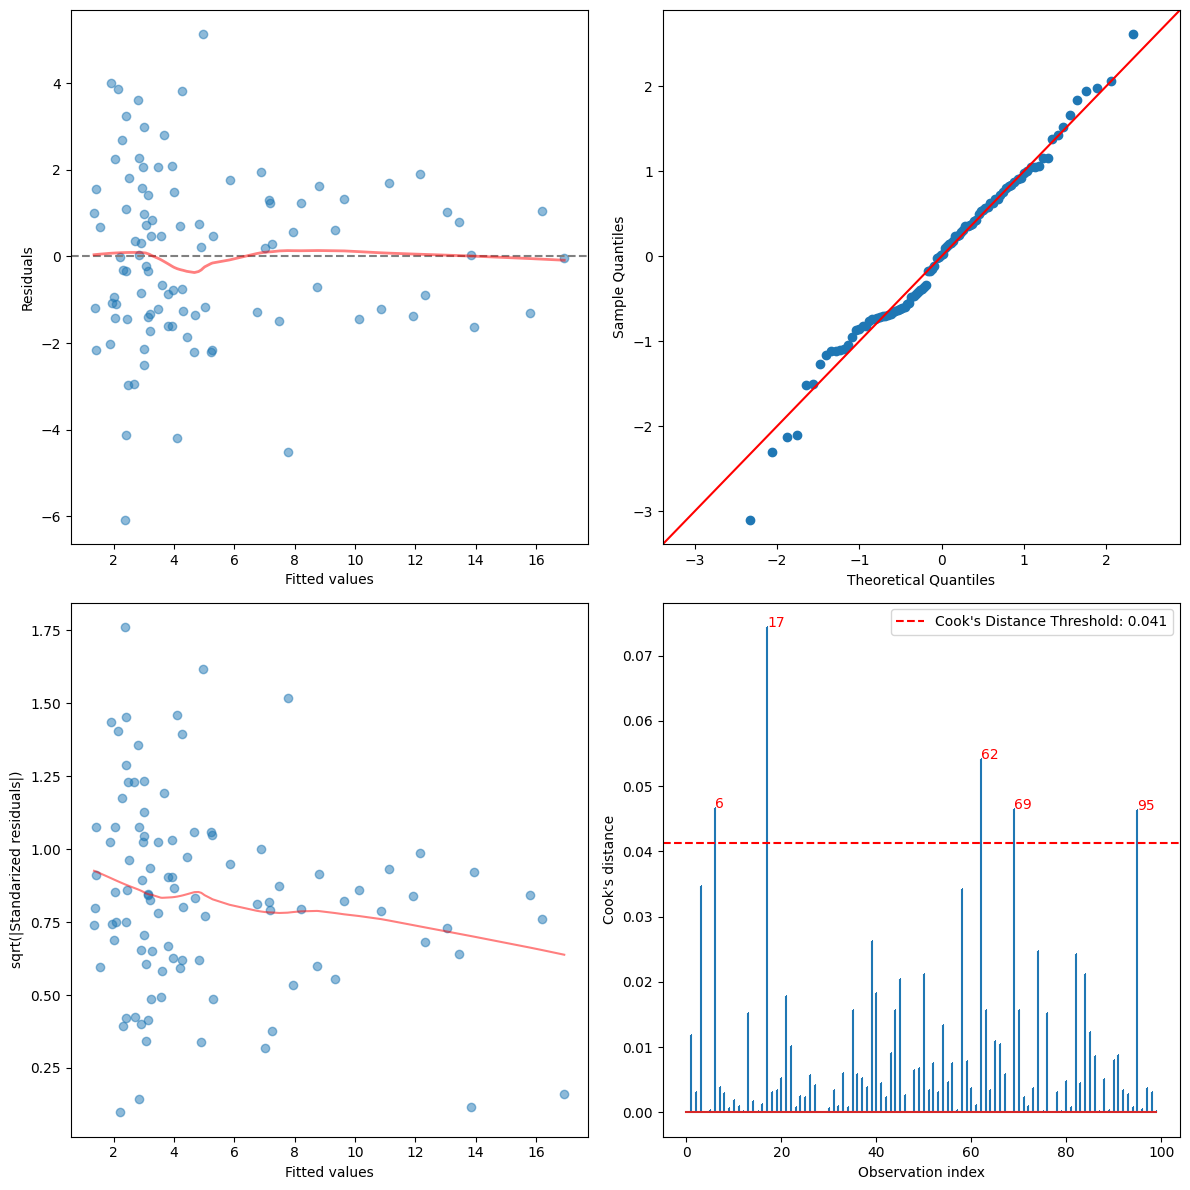

In [ ]:
ols_resid_plots(cubic_model)

In [ ]:
model_order_4 = smf.ols(formula = 'Y ~ X + I(X**2) + I(X**3) + I(X**4)', data = data).fit()
print(model_order_4.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     85.87
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.07e-30
Time:                        09:10:57   Log-Likelihood:                -208.68
No. Observations:                 100   AIC:                             427.4
Df Residuals:                      95   BIC:                             440.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2272      1.045      1.175      0.2

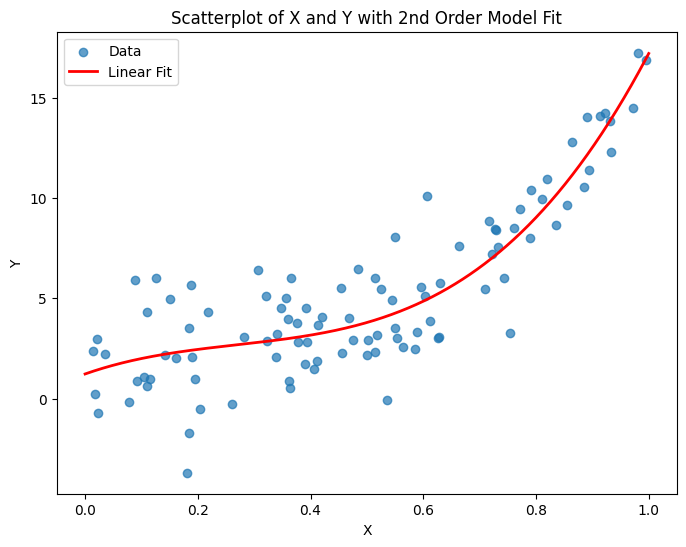

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['X'], data['Y'], label='Data', alpha=0.7)
b0, b1, b2, b3, b4 = model_order_4.params[0],model_order_4.params[1],model_order_4.params[2],model_order_4.params[3],model_order_4.params[4]
x = np.linspace(0, 1, 1000)
plt.plot(x, b0+b1*x+b2*x**2+b3*x**3+b4*x**4, color='red', label='Linear Fit', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of X and Y with 2nd Order Model Fit')
plt.legend()
plt.show()

<ipython-input-18-39383d77ab8e>:43: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axs[1, 1].stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)


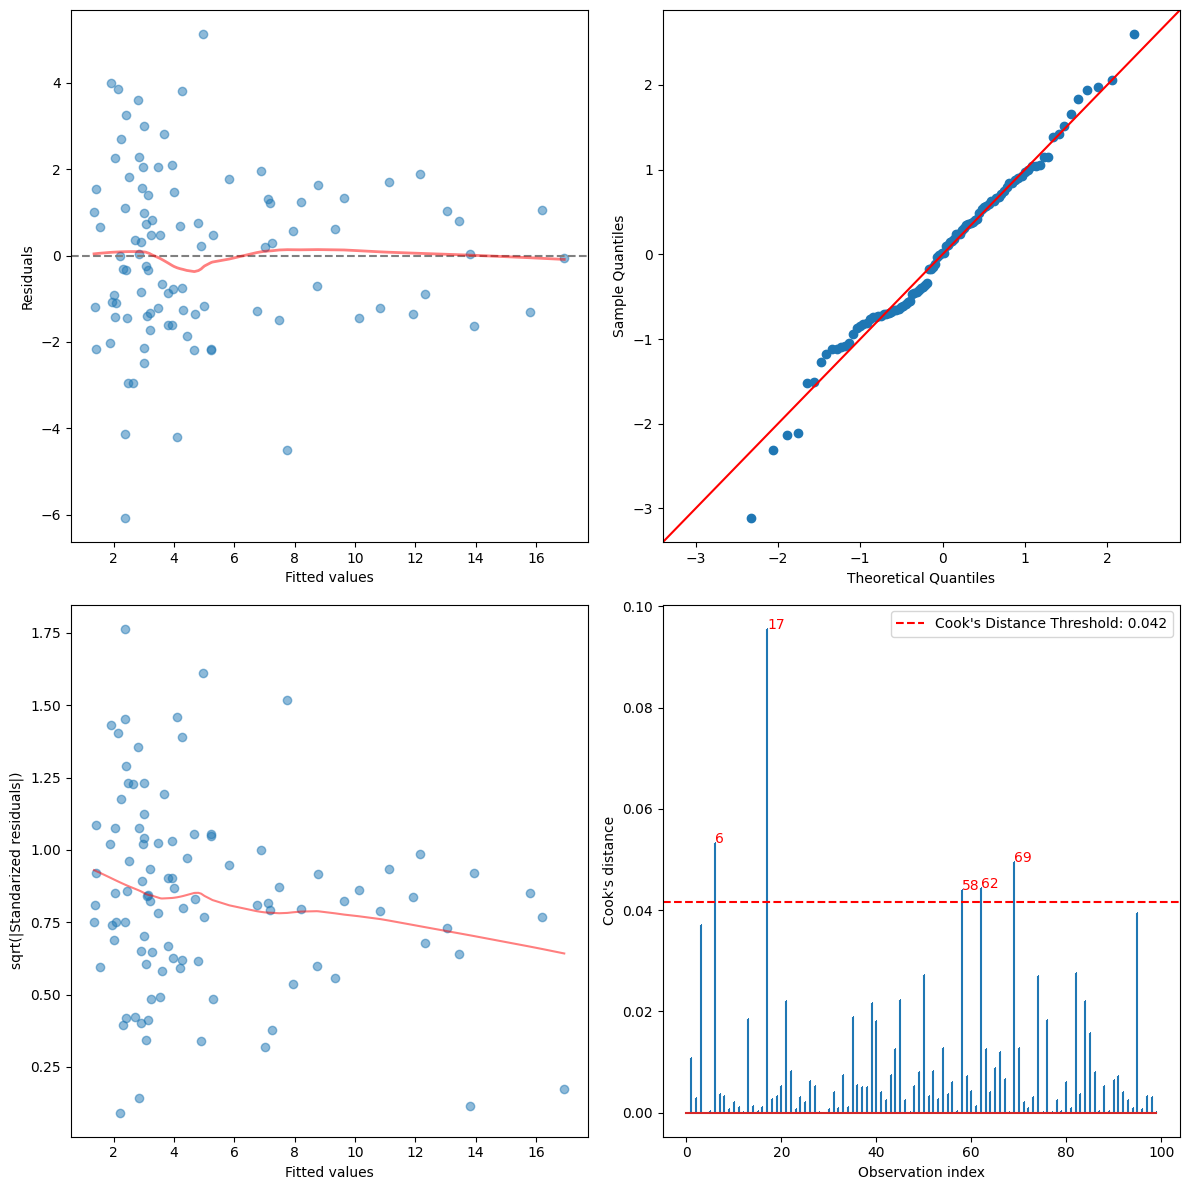

In [ ]:
ols_resid_plots(model_order_4)